In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
from geopandas import GeoDataFrame
import shapely

### Assignment 1

In [2]:
ct_shape = GeoDataFrame.from_file("/home/cusp/el2666/PUI2016_el2666/HW11_el2666/nycb2010.shp")

In [3]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [4]:
ct_shape = ct_shape.loc[ct_shape['BoroName'] == 'Brooklyn']

In [5]:
from fiona.crs import from_epsg
ct_shape.crs = from_epsg(2263) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
ct_latlong = ct_shape.to_crs(epsg=4326)

In [6]:
ct_latlong.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981344...
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,POLYGON ((-73.98514306089652 40.69488514296981...
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


In [7]:
ct = shapely.geometry.Point(40.6934, -73.9871)

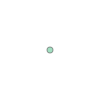

In [8]:
ct

In [12]:
for i, ct  in ct_latlong['geometry'].iteritems():
    print('CUSP is contained in', ct)


('CUSP is contained in', <shapely.geometry.polygon.Polygon object at 0x7f9b6a765650>)
('CUSP is contained in', <shapely.geometry.polygon.Polygon object at 0x7f9b6a7655d0>)
('CUSP is contained in', <shapely.geometry.polygon.Polygon object at 0x7f9b6a765590>)
('CUSP is contained in', <shapely.geometry.polygon.Polygon object at 0x7f9b6a765690>)
('CUSP is contained in', <shapely.geometry.polygon.Polygon object at 0x7f9b6a7654d0>)
('CUSP is contained in', <shapely.geometry.polygon.Polygon object at 0x7f9b6a765510>)
('CUSP is contained in', <shapely.geometry.polygon.Polygon object at 0x7f9b6a765290>)
('CUSP is contained in', <shapely.geometry.polygon.Polygon object at 0x7f9b6a7652d0>)
('CUSP is contained in', <shapely.geometry.polygon.Polygon object at 0x7f9b6a7651d0>)
('CUSP is contained in', <shapely.geometry.polygon.Polygon object at 0x7f9b6a765210>)
('CUSP is contained in', <shapely.geometry.polygon.Polygon object at 0x7f9b6a765110>)
('CUSP is contained in', <shapely.geometry.polygon.Pol

In [10]:
ct_latlong_every_ten = ct_latlong.iloc[::10]

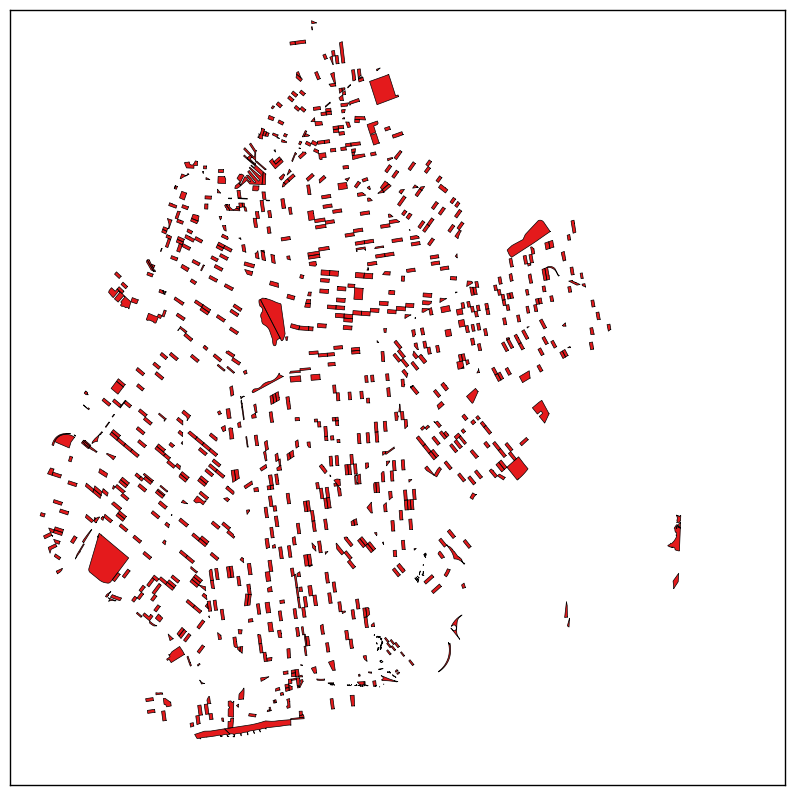

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_latlong_every_ten.plot(column='BoroName',alpha=1,linewidth=0.5,ax=ax)